<h1>Содержание<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Изучение-данных-из-файла" data-toc-modified-id="Изучение-данных-из-файла-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Изучение данных из файла</a></span></li><li><span><a href="#Предобработка-данных" data-toc-modified-id="Предобработка-данных-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Предобработка данных</a></span><ul class="toc-item"><li><span><a href="#Работа-с-пропусками" data-toc-modified-id="Работа-с-пропусками-2.1"><span class="toc-item-num">2.1&nbsp;&nbsp;</span>Работа с пропусками</a></span><ul class="toc-item"><li><span><a href="#Заполнение-нулевыми-значениями" data-toc-modified-id="Заполнение-нулевыми-значениями-2.1.1"><span class="toc-item-num">2.1.1&nbsp;&nbsp;</span>Заполнение нулевыми значениями</a></span></li><li><span><a href="#Переменные,-в-которых-пропуски-не-заполняются" data-toc-modified-id="Переменные,-в-которых-пропуски-не-заполняются-2.1.2"><span class="toc-item-num">2.1.2&nbsp;&nbsp;</span>Переменные, в которых пропуски не заполняются</a></span></li><li><span><a href="#Переменные-с-заполнением-по-среднему" data-toc-modified-id="Переменные-с-заполнением-по-среднему-2.1.3"><span class="toc-item-num">2.1.3&nbsp;&nbsp;</span>Переменные с заполнением по среднему</a></span><ul class="toc-item"><li><span><a href="#Ближайший-аэропорт" data-toc-modified-id="Ближайший-аэропорт-2.1.3.1"><span class="toc-item-num">2.1.3.1&nbsp;&nbsp;</span>Ближайший аэропорт</a></span></li></ul></li><li><span><a href="#Фильтрация-пропусков" data-toc-modified-id="Фильтрация-пропусков-2.1.4"><span class="toc-item-num">2.1.4&nbsp;&nbsp;</span>Фильтрация пропусков</a></span></li></ul></li><li><span><a href="#Изменение-типов-данных" data-toc-modified-id="Изменение-типов-данных-2.2"><span class="toc-item-num">2.2&nbsp;&nbsp;</span>Изменение типов данных</a></span></li></ul></li><li><span><a href="#Пронгнозирование-цены-квартиры:" data-toc-modified-id="Пронгнозирование-цены-квартиры:-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Пронгнозирование цены квартиры:</a></span><ul class="toc-item"><li><span><a href="#Добавление-новых-переменных" data-toc-modified-id="Добавление-новых-переменных-3.1"><span class="toc-item-num">3.1&nbsp;&nbsp;</span>Добавление новых переменных</a></span></li><li><span><a href="#Анализ-данных" data-toc-modified-id="Анализ-данных-3.2"><span class="toc-item-num">3.2&nbsp;&nbsp;</span>Анализ данных</a></span></li><li><span><a href="#Построение-модели" data-toc-modified-id="Построение-модели-3.3"><span class="toc-item-num">3.3&nbsp;&nbsp;</span>Построение модели</a></span><ul class="toc-item"><li><span><a href="#Построение-модели-и-оценка-качества" data-toc-modified-id="Построение-модели-и-оценка-качества-3.3.1"><span class="toc-item-num">3.3.1&nbsp;&nbsp;</span>Построение модели и оценка качества</a></span></li><li><span><a href="#Кластеризация" data-toc-modified-id="Кластеризация-3.3.2"><span class="toc-item-num">3.3.2&nbsp;&nbsp;</span>Кластеризация</a></span></li></ul></li></ul></li></ul></div>

# Исследование объявлений о продаже квартир

В вашем распоряжении данные сервиса Яндекc Недвижимость — архив объявлений о продаже квартир в Санкт-Петербурге и соседних населённых пунктах за несколько лет. Наша задача - научиться на имеющихся данных прогнозировать цену квартиры, а также разделить имеющееся жилье по сегментам. 

## Изучение данных из файла

In [24]:
# импорт общих библиотек
import os
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

#импорт библиотек для моделирования
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.metrics import roc_auc_score
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from scipy.cluster.hierarchy import dendrogram, linkage

In [2]:
#функция загрузки данных:
def downloader(x,y):
    if os.path.exists(x):
        return pd.read_csv(x, sep='\t')
    elif os.path.exists(y):
        return pd.read_csv(y, sep='\t')
    else:
        raise Exception('Download Error!')

#загрузка данных    
data = downloader('real_estate_data.csv','/datasets/real_estate_data.csv')

In [3]:
#функция описания данных
def description(data):
    display(data.head(5))
    print()
    display(data.info())
    print()
    display(data.describe())
    print()
    print('Кол-во дубликатов:', data.duplicated().sum())

Описание переменных
1. airports_nearest — расстояние до ближайшего аэропорта в метрах (м)
2. balcony — число балконов
3. ceiling_height — высота потолков (м)
4. cityCenters_nearest — расстояние до центра города (м)
5. days_exposition — сколько дней было размещено объявление (от публикации до снятия)
6. first_day_exposition — дата публикации
7. floor — этаж
8. floors_total — всего этажей в доме
9. is_apartment — апартаменты (булев тип)
10. kitchen_area — площадь кухни в квадратных метрах (м²)
11. last_price — цена на момент снятия с публикации
12. living_area — жилая площадь в квадратных метрах (м²)
13. locality_name — название населённого пункта
14. open_plan — свободная планировка (булев тип)
15. parks_around3000 — число парков в радиусе 3 км
16. parks_nearest — расстояние до ближайшего парка (м)
17. ponds_around3000 — число водоёмов в радиусе 3 км
18. ponds_nearest — расстояние до ближайшего водоёма (м)
19. rooms — число комнат
20. studio — квартира-студия (булев тип)
21. total_area — площадь квартиры в квадратных метрах (м²)
22. total_images — число фотографий квартиры в объявлении

In [4]:
#описание данных
description(data)

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
0,20,13000000.0,108.0,2019-03-07T00:00:00,3,2.70,16.0,51.0,8,NaN,...,25.0,NaN,Санкт-Петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,NaN
1,7,3350000.0,40.4,2018-12-04T00:00:00,1,NaN,11.0,18.6,1,NaN,...,11.0,2.0,посёлок Шушары,12817.0,18603.0,0.0,NaN,0.0,NaN,81.0
2,10,5196000.0,56.0,2015-08-20T00:00:00,2,NaN,5.0,34.3,4,NaN,...,8.3,0.0,Санкт-Петербург,21741.0,13933.0,1.0,90.0,2.0,574.0,558.0
3,0,64900000.0,159.0,2015-07-24T00:00:00,3,NaN,14.0,NaN,9,NaN,...,NaN,0.0,Санкт-Петербург,28098.0,6800.0,2.0,84.0,3.0,234.0,424.0
4,2,10000000.0,100.0,2018-06-19T00:00:00,2,3.03,14.0,32.0,13,NaN,...,41.0,NaN,Санкт-Петербург,31856.0,8098.0,2.0,112.0,1.0,48.0,121.0



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   total_images          23699 non-null  int64  
 1   last_price            23699 non-null  float64
 2   total_area            23699 non-null  float64
 3   first_day_exposition  23699 non-null  object 
 4   rooms                 23699 non-null  int64  
 5   ceiling_height        14504 non-null  float64
 6   floors_total          23613 non-null  float64
 7   living_area           21796 non-null  float64
 8   floor                 23699 non-null  int64  
 9   is_apartment          2775 non-null   object 
 10  studio                23699 non-null  bool   
 11  open_plan             23699 non-null  bool   
 12  kitchen_area          21421 non-null  float64
 13  balcony               12180 non-null  float64
 14  locality_name         23650 non-null  object 
 15  airports_nearest  

None

,total_images,last_price,total_area,rooms,ceiling_height,floors_total,living_area,floor,kitchen_area,balcony,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
count,23699.000000,2.369900e+04,23699.000000,23699.000000,14504.000000,23613.000000,21796.000000,23699.000000,21421.000000,12180.000000,18157.000000,18180.000000,18181.000000,8079.000000,18181.000000,9110.000000,20518.000000
mean,9.858475,6.541549e+06,60.348651,2.070636,2.771499,10.673824,34.457852,5.892358,10.569807,1.150082,28793.672193,14191.277833,0.611408,490.804555,0.770255,517.980900,180.888634
std,5.682529,1.088701e+07,35.654083,1.078405,1.261056,6.597173,22.030445,4.885249,5.905438,1.071300,12630.880622,8608.386210,0.802074,342.317995,0.938346,277.720643,219.727988
min,0.000000,1.219000e+04,12.000000,0.000000,1.000000,1.000000,2.000000,1.000000,1.300000,0.000000,0.000000,181.000000,0.000000,1.000000,0.000000,13.000000,1.000000
25%,6.000000,3.400000e+06,40.000000,1.000000,2.520000,5.000000,18.600000,2.000000,7.000000,0.000000,18585.000000,9238.000000,0.000000,288.000000,0.000000,294.000000,45.000000
50%,9.000000,4.650000e+06,52.000000,2.000000,2.650000,9.000000,30.000000,4.000000,9.100000,1.000000,26726.000000,13098.500000,0.000000,455.000000,1.000000,502.000000,95.000000
75%,14.000000,6.800000e+06,69.900000,3.000000,2.800000,16.000000,42.300000,8.000000,12.000000,2.000000,37273.000000,16293.000000,1.000000,612.000000,1.000000,729.000000,232.000000
max,50.000000,7.630000e+08,900.000000,19.000000,100.000000,60.000000,409.700000,33.000000,112.000000,5.000000,84869.000000,65968.000000,3.000000,3190.000000,3.000000,1344.000000,1580.000000



Кол-во дубликатов: 0


Данные успешно загружены, однако в них содержатся нереалистичные значения (например есть квартира с высотой потолков 1 метр и квартира с жилой площадью 2 метра), данные необходимо обработать. Также в данных есть пропуски, по которым необходимо будет принять решение о заполнении. 

## Предобработка данных

Для начала удалим лишние переменные, которые не понадобтся нам в анализе, это перменные, которые отвечают за срок экспозиции объявления

In [5]:
data=data.drop(['first_day_exposition','days_exposition'], axis = 1)

### Работа с пропусками

Видно, что в данных много пропусков. Логично их отработать. 

Из описания данных видно, что пропуски есть в следующих столцах: 
1) ceiling_height

2) floors_total

3) living_area

4) is_apartment

5) kitchen_area

6) balcony

7) locality_name

8) airports_nearest

9) cityCenters_nearest

10) parks_around3000

11) parks_nearest

12) ponds_around3000

13) ponds_nearest

14) days_exposition

#### Заполнение нулевыми значениями

Часть пропусков можно заполнить сразу. Так, в переменных is_apartment, balcony, parks_around3000 и ponds_around3000 логично заполнить пропуски нулевыми значениями, т.к. если эти признаки не указаны, их скорее всего нет.

In [6]:
#заполняем переменные с балконами и апартаментами
for column in ('is_apartment', 'balcony', 'parks_around3000', 'ponds_around3000'):
    data[column] = data[column].fillna(0)
    
#проверка работы цикла
#print(data.head(10)) 

#### Переменные, в которых пропуски не заполняются

Ряд других перменных логично оставить без ликвидации пропусков, т.к. появление пропусков в этих переменных не случайно или мы не можем их заполнить. К таким переменным относятся: 
1) days_exposition - тут пропуски означают, что на момент выгрузки данных объявление не было снято с экспозиции. 

2) parks_nearest, ponds_nearest - данные переменные заполнены только для тех квартир, у которых есть соответственно, парк и и пруд в пределах трех километров. Пропуск означает, что их нет в пределах трех километров.

3) kitchen_area, living_area, locality_name, floors_total, ceiling_height - пропуски в данных переменных приедтся оставить, т.к. у нас нет источника, из которого можно было бы получить данные для заполнения столбцов. В дальнейшем строки с пропусками в этих переменных возможно придется исключить из выборки.

4) cityCenters_nearest - из описания датасета неясно, имеется ли в виду расстояние до центра Петербурга или до центра населенного пункта, в котором находится квартира. Поэтому мы не можем заполнить значения корректно. 

#### Переменные с заполнением по среднему

Из нерассмотренных переменных у нас остается только переменная airports_nearest

По ней представляется разумным заполнить пропуски исходя из медианы по группе, которая формируется на основании locality_name. Это разумно, поскольку аэропорт в ЛО только один и расстояние оценивается наверняка до него. 

Для работы с этими пропусками необходимо для начала проверить переменную locality_name

In [7]:
print(data['locality_name'].unique())

['Санкт-Петербург' 'посёлок Шушары' 'городской посёлок Янино-1'
 'посёлок Парголово' 'посёлок Мурино' 'Ломоносов' 'Сертолово' 'Петергоф'
 'Пушкин' 'деревня Кудрово' 'Коммунар' 'Колпино'
 'поселок городского типа Красный Бор' 'Гатчина' 'поселок Мурино'
 'деревня Фёдоровское' 'Выборг' 'Кронштадт' 'Кировск'
 'деревня Новое Девяткино' 'посёлок Металлострой'
 'посёлок городского типа Лебяжье' 'посёлок городского типа Сиверский'
 'поселок Молодцово' 'поселок городского типа Кузьмоловский'
 'садовое товарищество Новая Ропша' 'Павловск' 'деревня Пикколово'
 'Всеволожск' 'Волхов' 'Кингисепп' 'Приозерск' 'Сестрорецк'
 'деревня Куттузи' 'посёлок Аннино' 'поселок городского типа Ефимовский'
 'посёлок Плодовое' 'деревня Заклинье' 'поселок Торковичи'
 'поселок Первомайское' 'Красное Село' 'посёлок Понтонный' 'Сясьстрой'
 'деревня Старая' 'деревня Лесколово' 'посёлок Новый Свет' 'Сланцы'
 'село Путилово' 'Ивангород' 'Мурино' 'Шлиссельбург' 'Никольское'
 'Зеленогорск' 'Сосновый Бор' 'поселок Новый Све

На основе уникальных значений сразу можно увидеть повторы. Причины повторов видны следующие: 
1) Использование букв е и ё в названиях. 

2) Использование города с названием и без названия населенного пункта ('Кудрово' и 'деревня Кудрово')

3) Также бросается в глаза использование верхнего регистра, которые также может стать источником ошибок.

В связи с этим следует сделать следующее: 

1) Перевести все в нижний регистр.

2) Убрать из названий типы населенных пунктов

3) Заменить везде ё на е. 

In [8]:
#все в нижний регистр
data['locality_name'] = data['locality_name'].str.lower()

#заменка ё на е
data['locality_name'] = data['locality_name'].astype(str)
data['locality_name'] = data['locality_name'].apply(lambda x:x.replace('ё', 'е'))

#убираем определения населенный пунктов.
city_types = ('коттеджный поселок ', 'городской поселок ', 'поселок городского типа ',
              'поселок при железнодорожной станции  ', 'поселок станции ', 'поселок ', 'деревня ', 'село ',
              'садовое товарищество ', 'при железнодорожной станции ', 'садоводческое некоммерческое товарищество ')
for value in city_types:
    data['locality_name'] = data['locality_name'].apply(lambda x:x.replace(value, ''))
 
data=data.sort_values('locality_name')
#проверка
print(data['locality_name'].unique())

['nan' 'агалатово' 'александровская' 'алексеевка' 'аннино' 'аро'
 'барышево' 'батово' 'бегуницы' 'белогорка' 'белоостров' 'бокситогорск'
 'большая вруда' 'большая ижора' 'большая пустомержа' 'большие колпаны'
 'большое рейзино' 'большой сабск' 'бор' 'борисова грива' 'бугры'
 'будогощь' 'ваганово' 'важины' 'вартемяги' 'вахнова кара' 'вещево'
 'виллози' 'вознесенье' 'возрождение' 'войсковицы' 'войскорово'
 'володарское' 'волосово' 'волхов' 'всеволожск' 'выборг' 'вырица'
 'выскатка' 'высокоключевой' 'высоцк' 'гаврилово' 'гарболово' 'гатчина'
 'гладкое' 'глажево' 'глебычево' 'глинка' 'гончарово' 'горбунки'
 'гостилицы' 'громово' 'дзержинского' 'дружная горка' 'дружноселье'
 'дубровка' 'елизаветино' 'ефимовский' 'жилгородок' 'жилпоселок' 'житково'
 'заводской' 'заклинье' 'заневка' 'запорожское' 'зеленогорск' 'зимитицы'
 'ивангород' 'извара' 'ильичево' 'имени морозова' 'имени свердлова'
 'иссад' 'калитино' 'каложицы' 'кальтино' 'каменногорск' 'камышовка'
 'каськово' 'келози' 'кивеннапа север

В списке есть несколько пар населенных пунктов с похожими названиями, однако анализ показал, что ээто разные населенные пункты, а не дубли, поэтому убирать их необходимости нет. 

После того как были устранены неявные дубликаты в переменно отвечающей за местоположение квартиры, можно переходить к устранению пропусков в переменных отвечающей за расстояние до аэропорта.

##### Ближайший аэропорт

Заполним переменную по среднему.

In [9]:
median_airport = data.groupby('locality_name')['airports_nearest'].transform('median')
data['airports_nearest'] = data['airports_nearest'].fillna(median_airport)

#print(data['airports_nearest'])

#### Фильтрация пропусков

Несмотря на то, что нам частично удалось заполнить пропуски в значимых для нас переменных, у нас остается некоторое количество проусков в значимых для построения модели переменных. К ним относятся: жилая площадь, площадь кухни и высота потолков. Пропуски в этих переменных придется удалять. 

In [10]:
data=data.dropna(subset=['living_area', 'ceiling_height', 'kitchen_area', 'floors_total'])

#description(data)

### Изменение типов данных

У нас есть одна перменная тип которой необходимо изменить - переменная отвечающая за то, апартаменты перед нами или нет. 

In [11]:
data['is_apartment'] = data['is_apartment'].astype(bool)

Проводить с переменными какие-то еще смены типов причин нет, типы соответствует значениям. Округлять до метра площади частей квартиры и квартиры в целом не стоит, т.к. это может снизить точность расчетов. 

Предобработка данных успешно завершена. 

## Пронгнозирование цены квартиры: 

### Добавление новых переменных

С точки зрения прогнозирования цены могут оказаться значимы следующие перменные, которые являются произовдными от наших:

In [12]:
data['price_per_meter'] = data['last_price']/data['total_area'] #цена за метр
data['living_share'] = data['living_area']/data['total_area'] #доля жилой площади
data['kitchen_share'] = data['kitchen_area']/data['total_area'] #доля площади кухни

Также важным для цены квартиры может оказаться то, что это первый или последний этаж. Создадим категориальные переменные, которые будут это отражать. 

In [13]:
# создаем переменные индекса этажа, итоговая переменная floor_index принимает значения:
# 0, если это не первый и не последний этаж, 1 - если последний этаж, 2 - если первый этаж
# если дом одноэтажный, перменная принимает значение 3.

def last_floor_index(floor):
    if floor == 0:
        return 1
    else:
        return 0

def first_floor_index(floor):
    if floor == 1:
        return 2
    else:
        return 0
    
data['floor_index'] = data['floors_total']-data['floor']
data['floor_index_last'] = data['floor_index'].apply(last_floor_index)
data['floor_index_first'] = data['floor'].apply(first_floor_index)

data['floor_index_last'].fillna(0)
data['floor_index_first'].fillna(0)
data['floor_index'] = data['floor_index_last'] + data['floor_index_first']

### Анализ данных 
Посмотрим, какие из  имеющихся у нас перменных сильно скоррелированы друг с другом и ценой квартиры:

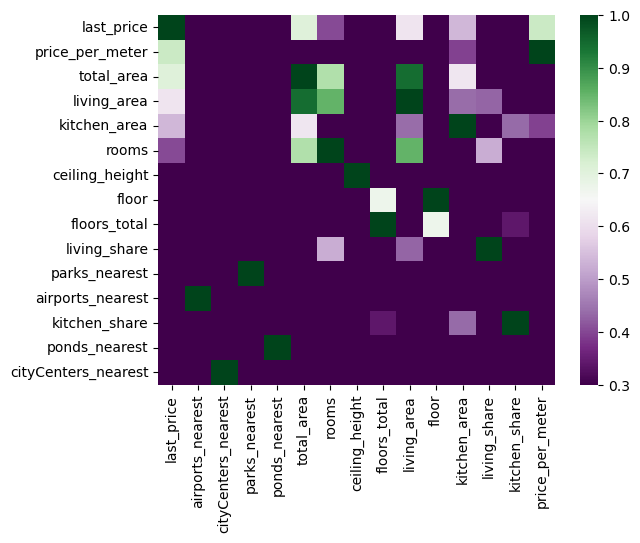

In [16]:
#положительная корреляция
num_cols = ['last_price','airports_nearest', 'cityCenters_nearest', 
            'parks_nearest', 'ponds_nearest', 'total_area', 
            'rooms', 'ceiling_height', 'floors_total', 'living_area', 'floor', 
            'kitchen_area', 'living_share', 'kitchen_share','price_per_meter']
sns.heatmap(
    data[num_cols]\
        .where(data[num_cols]>-1)\
        .corr()\
        .sort_values('last_price',ascending=False),
    vmin=0.3, vmax=1, cmap="PRGn");

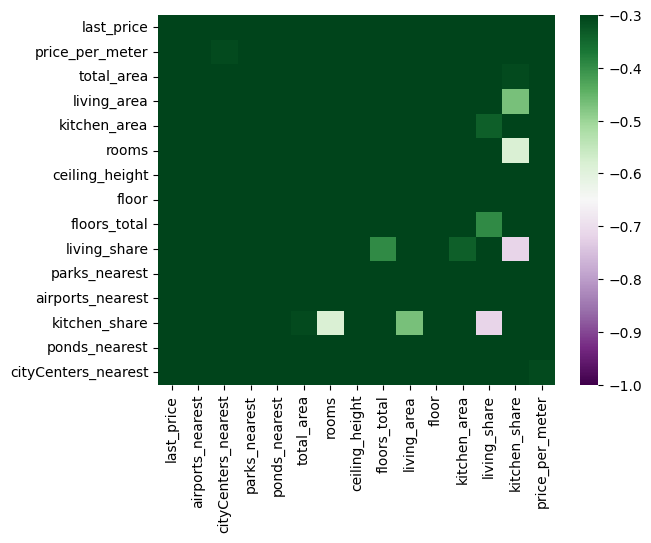

In [17]:
#отрицательная корреляция
sns.heatmap(
    data[num_cols]\
        .where(data[num_cols]>-1)\
        .corr()\
        .sort_values('last_price',ascending=False),
    vmin=-1, vmax=-0.3, cmap="PRGn");

Отмечается высокая корреляция цены квартиры с площадью (жилой, общей и кухни), количеством комнат и ценой за метр квадратный. Значительная отрицательная корреляция цены на квартиру с какими-то парамтерами не наблюдается. 

Цена квартиры коррелирована с линейными параметрами квартиры. 
А цена квадратного метра коррелирует с удаленностью от центра города и площадью кухни.

Помимо количественных переменных у нас также есть и категориальные, которые не могут быть оценены корреляцией. К этим переменным относятся булевы переменные апартаментов и свободной планировки, а также перменную с итоговым индексом этажа (она наиболее информативна из трех). 

In [18]:
#построение сводной диаграммы
for value in ['floor_index','open_plan','is_apartment','studio']:
    pivot = data.pivot_table(aggfunc='mean', columns = value, values = 'price_per_meter')
    display(pivot)

floor_index,0,1,2,3
price_per_meter,105145.454165,95811.990172,85304.747265,61179.148051


open_plan,False
price_per_meter,101299.521284


is_apartment,False,True
price_per_meter,101223.459039,136188.486632


studio,False
price_per_meter,101299.521284


То что квартира находится не на первом и не на последнем этаже повышает ее стоимость, одноэтажность - снижает. Первый этаж снижает цену квартиры сильнее, чем последний. 

То что квартира является апартаментами повышает ее стоимость за метр. Данный вывод контринтуитивен и заслуживает большого внимания. Сделать выводы по студиям и свободной планировке не представляется возможным. 

### Построение модели
Выделим оцениваемую переменную и поделим выборку на обучающую и тестовую: 

In [57]:
# разделение данных на признаки (матрица X) и целевую переменную (y)
X = data[['total_area', 'price_per_meter']]
y = data['last_price']

# разделение данных на обучающую и валидационную выборку
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

#### Построение модели и оценка качества

In [58]:
def predictor(model_name, model):
    
    # построение модели
    instr=model
    instr.fit(X_train, y_train)
    y_pred = instr.predict(X_test)
    r=instr.score(X_test,y_pred)
    
    #вывод метрик качества модели
    print(model_name)
    print('Коэффициент детерминации:',r)

In [59]:
predictor('Линейная регрессия:', LinearRegression())

Линейная регрессия:
Коэффициент детерминации: 1.0


#### Кластеризация

Попробуем выделить основные типы квартир, которые представлены на рынке. Рассматривать будем только метрические параметры самой квартиры. Для начала построим дендрограмму для определения количества кластеров: 

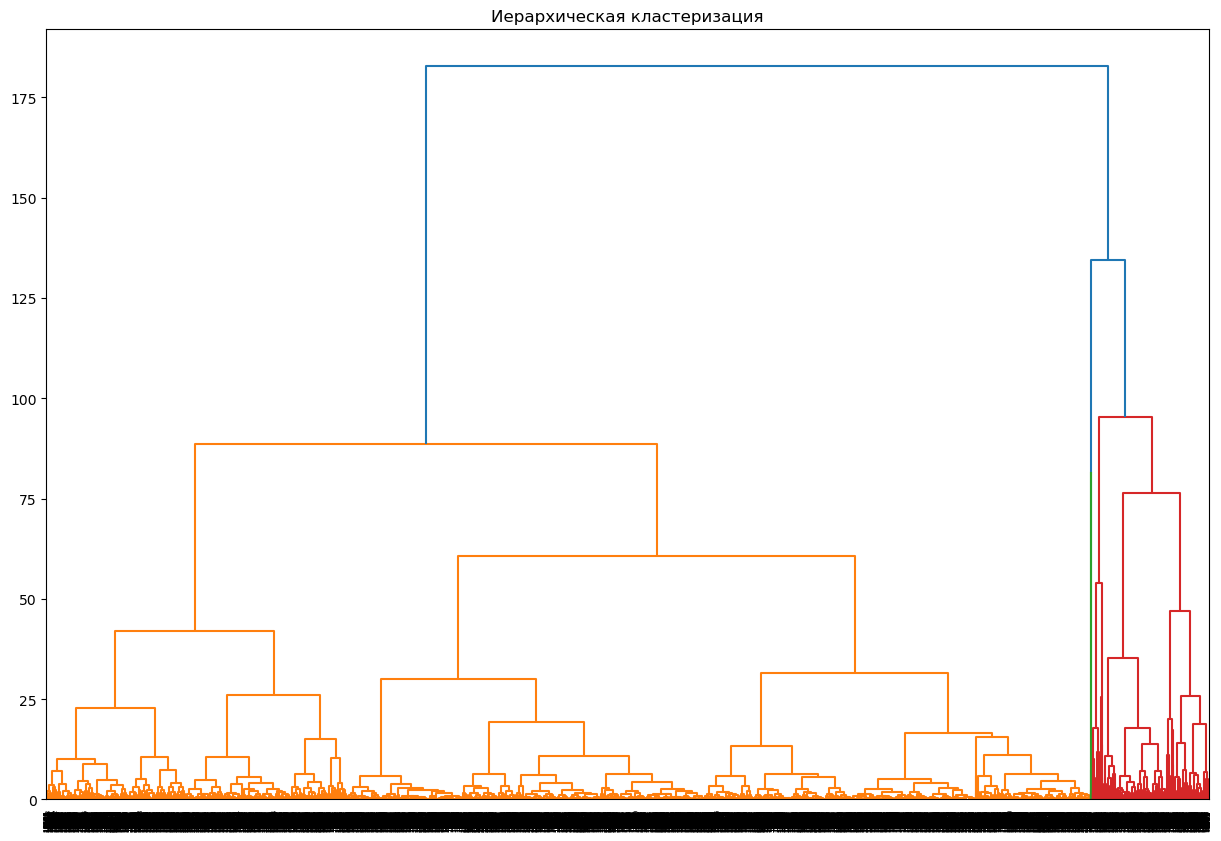

In [60]:
#стандартизация данных
X= data[['total_area', 'ceiling_height', 'living_area', 'kitchen_area']]
sc = StandardScaler()
x_sc = sc.fit_transform(X)

#расчет данных для дендрограммы
linked = linkage(x_sc, method = 'ward') 

#риснок дендрограммы
plt.figure(figsize=(15, 10))  
dendrogram(linked, orientation='top')
plt.title('Иерархическая кластеризация')
plt.show() 

Модель пределагает 3 кластера. 

In [66]:
X= data[['total_area', 'ceiling_height', 'living_area', 'kitchen_area']]
# задаем число кластеров
km = KMeans(n_clusters=3, random_state=0) 

# деление на кластеры
labels = km.fit_predict(X)

#присвоение номера кластера наблюдениям
X['cluster_km'] = labels

#оценка распрделения признаков по кластерам
print("Средние значения признаков по кластерам:")
display(X.groupby(['cluster_km']).mean())
print()

#вывод размеров кластеров
print("Размеры кластеров:")
display(data.groupby(['cluster_km'])['cluster_km'].count())

E:\Anaconda\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


Средние значения признаков по кластерам:


C:\Users\Генадий\AppData\Local\Temp\ipykernel_1520\2318335488.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X['cluster_km'] = labels


,total_area,ceiling_height,living_area,kitchen_area
cluster_km,,,,
0,46.022019,2.693269,25.798387,8.791183
1,205.047426,3.248981,124.416059,23.720804
2,87.026414,2.895149,51.716573,13.505319



Размеры кластеров:


cluster_km
0    9241
1     373
2    3717
Name: cluster_km, dtype: int64

В итоге мы получили 3 кластера, которые достаточно четко хараеткризуют квартиры разной площади